<a href="https://colab.research.google.com/github/marlEvalDissertation/marlEvalDiss/blob/main/Results_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Algorithm Performance Evaluation Results

## Roland Dubb
## February 2024

This notebook performs an analysis of the results of an algorithm performance evaluation done using a guideline produced for my dissertation titled:

**Addressing Deep Reinforcement Learning Empirical Algorithm Performance Evaluations**

The analysis looks at the data found in my [repository](https://github.com/marlEvalDissertation/marlEvalDiss/tree/main/RL_data) which was collected using this [notebook](https://github.com/marlEvalDissertation/marlEvalDiss/blob/main/Guideline_Data_Collection.ipynb). The analysis looks at the aggregated algorithm performances which is compiled using this [notebook](https://github.com/marlEvalDissertation/marlEvalDiss/blob/main/Guideline_Data_Aggregation.ipynb).

The analysis in this notebook looks at understanding the performance profiles of the aggregated algorithm performance scores and also understanding the sensitivty to changes in the aggregation weights. The analysis is found in section 4.2.3 of my dissertation.

### Reading the Peformance Data from CSVs

The CSVs are found in my [repo](https://github.com/marlEvalDissertation/marlEvalDiss/tree/main/RL_data)

In [1]:
envs = c("cart","acro","ll")
algs = c("a2c","dqn","ppo")
fileNames = c()
for(i in envs)
{
for(j in algs)
{
for(runs in 1:5)
{
  fileNames = c(fileNames,paste(i,"_",j,runs,".txt.csv",sep=""))
}
}
}

Create arrays of performance data for each algorithm on each task.

In [2]:
ppoCart = c()
a2cCart = c()
dqnCart = c()
ppoAcro = c()
dqnAcro = c()
a2cAcro = c()
dqnLuLa = c()
a2cLuLa = c()
ppoLuLa = c()

count = 1

for(i in fileNames)
{
   if(count<=15) #cartpole
   {
    data <- read.csv(i)
    if(count<=5)#A2C
    {
      a2cCart = c(a2cCart,data$rewards[10])
    }
    else if(count>=6 && count<=10)#DQN
    {
      dqnCart = c(dqnCart,data$rewards[10])
    }
    else#PPO
    {
      ppoCart = c(ppoCart,data$rewards[10])
    }
   }

   else if (count>=16 && count <=30) #Acrobot
   {
    data <- read.csv(i)
    if(count<=20)#A2C
    {
      a2cAcro = c(a2cAcro,data$rewards[10])
    }
    else if(count>=21 && count <=25)#DQN
    {
      dqnAcro = c(dqnAcro,data$rewards[10])
    }
    else#PPO
    {
      ppoAcro = c(ppoAcro,data$rewards[10])
    }
   }

   else # Lunar Lander
   {
    data <- read.csv(i)
    if(count<=35)#A2C
    {
      a2cLuLa = c(a2cLuLa,data$rewards[10])
    }
    else if(count>=36 && count<=40)#DQN
    {
      dqnLuLa = c(dqnLuLa,data$rewards[10])
    }
    else#PPO
    {
      ppoLuLa = c(ppoLuLa,data$rewards[10])
    }
   }

   count = count +1

}

### Construct Partial Value Functions and Save Weights

The constructed partial value functions and weights are found in my data aggregation [notebook](https://github.com/marlEvalDissertation/marlEvalDiss/blob/main/Guideline_Data_Aggregation.ipynb) and in section 4.1. of my dissertation

In [3]:
# PARTIAL VALUE FUNCTIONS
x <- c(0, 250, 350, 450, 500)
y <- c(0, 25, 50, 75, 100)

# Construct piecewise linear function
Gcartpole <- approxfun(x, y)

x <- c(-500, -200, -150, -75, -50)
y <- c(0, 25, 50, 75, 100)

# Construct piecewise linear function
Gacrobot <- approxfun(x, y)

x <- c(-3000, -200, 0, 200, 300)
y <- c(0, 25, 50, 75, 100)

# Construct piecewise linear function
Glula <- approxfun(x, y)

In [44]:
CartPoleWeight = 3/9
LunarLanderWeight = 4/9
Acrobotweight = 2/9

N_lula = 5
N_acro = 5
N_cart = 5

cart_weight_q = CartPoleWeight/N_cart
acro_weight_q = Acrobotweight/N_acro
lula_weight_q = LunarLanderWeight/N_lula

# cart_weight_q = 0.2
# acro_weight_q = 0.2
# lula_weight_q = 0.2

### Plot Performance Profiles of the Algorithms in terms of their weighted and normalised scores per task

Getting the weighted normalised score data

In [38]:
  # DQN
  cart_DQN_Score = 0
  acro_DQN_Score = 0
  lula_DQN_Score = 0
  for(j in 1:5)#runs per task
  {
      cart_DQN_Score = cart_DQN_Score+(cart_weight_q)*Gcartpole(dqnCart[j])
      acro_DQN_Score = acro_DQN_Score+(acro_weight_q)*Gacrobot(dqnAcro[j])
      lula_DQN_Score = lula_DQN_Score+(lula_weight_q)*Glula(dqnLuLa[j])
  }

In [39]:
# A2C
  cart_A2C_Score = 0
  acro_A2C_Score = 0
  lula_A2C_Score = 0
  for(j in 1:5)#runs per task
  {
  cart_A2C_Score = cart_A2C_Score+(cart_weight_q)*Gcartpole(a2cCart[j])
  acro_A2C_Score = acro_A2C_Score+(acro_weight_q)*Gacrobot(a2cAcro[j])
  lula_A2C_Score = lula_A2C_Score+(lula_weight_q)*Glula(a2cLuLa[j])
  }

In [40]:
# PPO
  cart_PPO_Score = 0
  acro_PPO_Score = 0
  lula_PPO_Score = 0
  for(j in 1:5)#runs per task
  {
      cart_PPO_Score = cart_PPO_Score+(cart_weight_q)*Gcartpole(ppoCart[j])
      acro_PPO_Score = acro_PPO_Score+(acro_weight_q)*Gacrobot(ppoAcro[j])
      lula_PPO_Score = lula_PPO_Score+(lula_weight_q)*Glula(ppoLuLa[j])
  }

In [41]:
# gathering data into a dataframe
df <- data.frame(
  Algorithm = c("PPO", "A2C", "DQN"),
  Cart_Pole = c(cart_PPO_Score, cart_A2C_Score, cart_DQN_Score),
  Acrobot = c(acro_PPO_Score, acro_A2C_Score, acro_DQN_Score),
  Lunar_Lander = c(lula_PPO_Score, lula_A2C_Score, lula_DQN_Score)
)

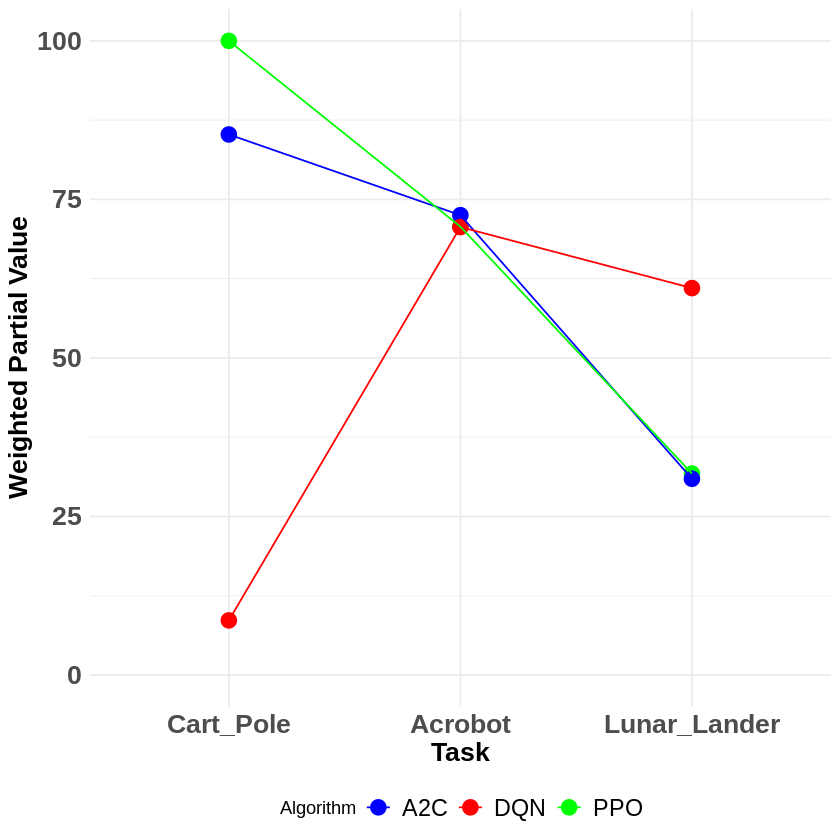

In [43]:
# plotting the performance Profile
# Reshaping the data to long format
library(tidyr)
df_long <- pivot_longer(df, cols = -Algorithm, names_to = "Task", values_to = "Weighted_Partial_Value")
df_long$Task <- factor(df_long$Task, levels = c("Cart_Pole", "Acrobot", "Lunar_Lander"))
# Plotting with ggplot2
library(ggplot2)

ggplot(df_long, aes(x = Task, y = Weighted_Partial_Value, color = Algorithm, group = Algorithm)) +
  geom_point(size = 4) +
  geom_line() +
  scale_y_continuous(name = "Weighted Partial Value", limits = c(0, 100)) +
  scale_x_discrete(name = "Task") +
  theme_minimal() +
  theme(legend.position = "bottom",
    axis.text = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 14)
  ) +
  labs(color = "Algorithm") +
  scale_color_manual(values = c("blue", "red", "green")) +
  guides(color = guide_legend(override.aes = list(size = 4)))


### Sensitivty Analysis of Weights

We exclude Acrobot due to irrelevance. We exclude A2C due to dominance (from PPO). We variate the weights of Lunar Lander vs PPO to determine the decision boundaries in terms of the rankings of DQN vs PPO